<a href="https://colab.research.google.com/github/suraj11kasasudhan/vgg16_image_classification/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


In [6]:
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/MyDrive/ drowsiness dateset/train"
valid_path = '/content/drive/MyDrive/ drowsiness dateset/test'



In [7]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [9]:
  # useful for getting number of classes
folders = glob( "/content/drive/MyDrive/ drowsiness dateset/train/*")
print(folders)

['/content/drive/MyDrive/ drowsiness dateset/train/Open_Eyes', '/content/drive/MyDrive/ drowsiness dateset/train/Closed_Eyes']


In [10]:
x = Flatten()(vgg.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

In [13]:

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/ drowsiness dateset/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ drowsiness dateset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4045 images belonging to 2 classes.
Found 485 images belonging to 2 classes.


In [15]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
127/127 [==============================] - 1263s 10s/step - loss: 0.5703 - accuracy: 0.7688 - val_loss: 1.9196 - val_accuracy: 0.1753
Epoch 2/10
127/127 [==============================] - 54s 422ms/step - loss: 0.1229 - accuracy: 0.9638 - val_loss: 2.5786 - val_accuracy: 0.0845
Epoch 3/10
127/127 [==============================] - 54s 421ms/step - loss: 0.0805 - accuracy: 0.9822 - val_loss: 3.2950 - val_accuracy: 0.0041
Epoch 4/10
127/127 [==============================] - 53s 420ms/step - loss: 0.0666 - accuracy: 0.9820 - val_loss: 3.6096 - val_accuracy: 0.0268
Epoch 5/10
127/127 [==============================] - 54s 421ms/step - loss: 0.0500 - accuracy: 0.9884 - val_loss: 4.0101 - val_accuracy: 0.0021
Epoch 6/10
127/127 [==============================] - 53s 420ms/step - loss: 0.0384 - accuracy: 0.9945 - val_loss: 4.3547 - val_accuracy: 0.0000e+00
Epoch 7/10
127/127 [==============================] - 54s 422ms/step - loss: 0.0314 - accuracy: 0.9931 - val_loss: 4.4667 - va

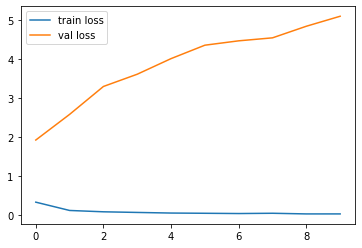

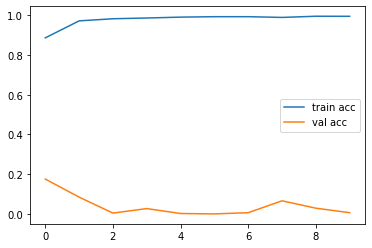

<Figure size 432x288 with 0 Axes>

In [18]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = '/kaggle/input/images/dog.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [ ]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [ ]:
#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)